Counter({0: 9900, 1: 100})


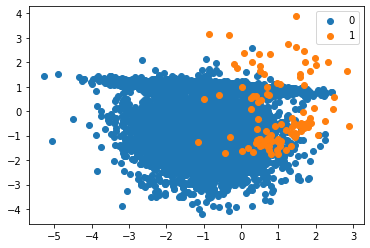

In [1]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=2, weights=[0.99], flip_y=0, random_state=4)

# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [2]:
# standard neural network on an imbalanced classification dataset
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from keras.layers import Dense
from keras.models import Sequential

# prepare train and test dataset
def prepare_data():
	# generate 2d classification dataset
	X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=2, weights=[0.99], flip_y=0, random_state=4)
	# split into train and test
	n_train = 5000
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	return trainX, trainy, testX, testy

# define the neural network model
def define_model(n_input):
    
    # define model
    model = Sequential()
    
    # define first hidden layer and visible layer
    model.add(Dense(10, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
    
    # define output layer
    model.add(Dense(1, activation='sigmoid'))
    
    # define loss and optimizer
    model.compile(loss='binary_crossentropy', optimizer='sgd')
    return model

# prepare dataset
trainX, trainy, testX, testy = prepare_data()

# define the model
n_input = trainX.shape[1]
model = define_model(n_input)

# fit model
model.fit(trainX, trainy, epochs=100, verbose=0)

# make predictions on the test dataset
yhat = model.predict(testX)

# evaluate the ROC AUC of the predictions
score = roc_auc_score(testy, yhat)
print('ROC AUC: %.3f' % score)

ROC AUC: 0.940


In [3]:
# class weighted neural network on an imbalanced classification dataset
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from keras.layers import Dense
from keras.models import Sequential

# prepare train and test dataset
def prepare_data():
    
    # generate 2d classification dataset
    X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=2, weights=[0.99], flip_y=0, random_state=4)
    
    # split into train and test
    n_train = 5000
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

# define the neural network model
def define_model(n_input):
    
    # define model
    model = Sequential()
    
    # define first hidden layer and visible layer
    model.add(Dense(10, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
    
    # define output layer
    model.add(Dense(1, activation='sigmoid'))
    
    # define loss and optimizer
    model.compile(loss='binary_crossentropy', optimizer='sgd')
    return model

# prepare dataset
trainX, trainy, testX, testy = prepare_data()

# get the model
n_input = trainX.shape[1]
model = define_model(n_input)

# fit model
weights = {0:1, 1:100}
history = model.fit(trainX, trainy, class_weight=weights, epochs=100, verbose=0)

# evaluate model
yhat = model.predict(testX)
score = roc_auc_score(testy, yhat)
print('ROC AUC: %.3f' % score)

ROC AUC: 0.974
